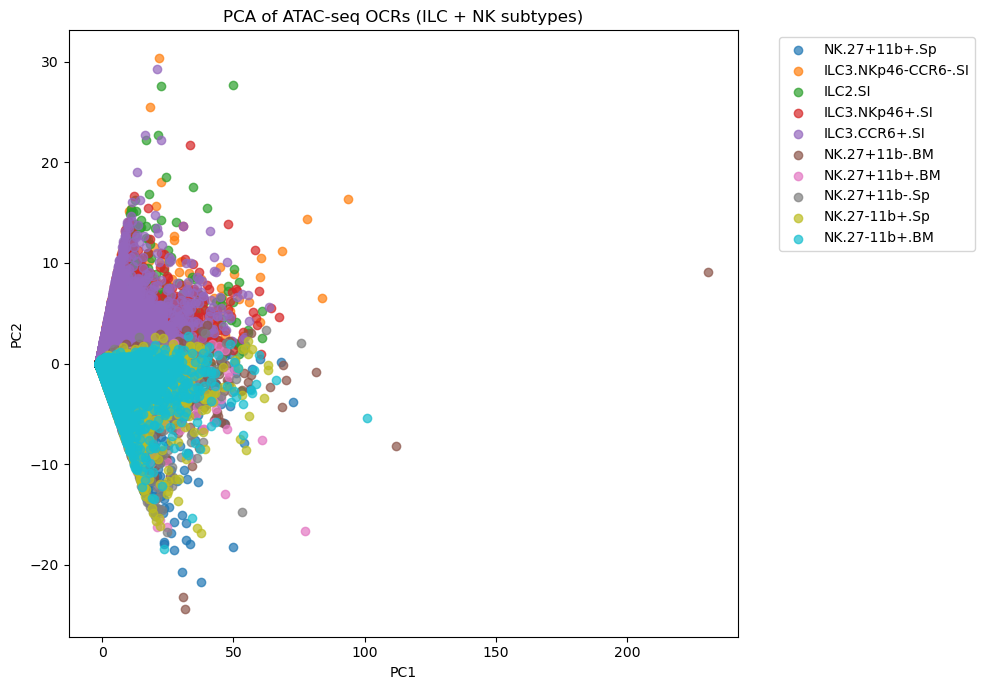

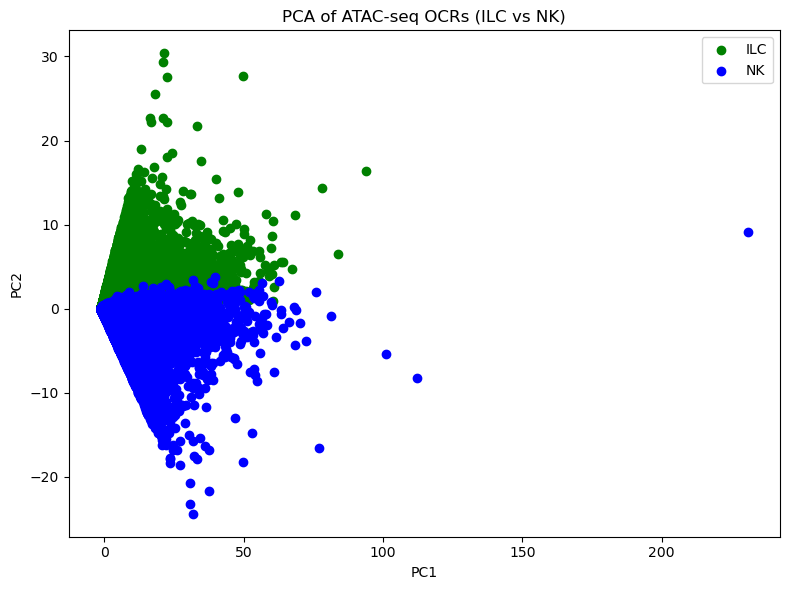

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

cols = ["ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI",
        "NK.27+11b-.BM", "NK.27+11b+.BM", "NK.27-11b+.BM",
        "NK.27+11b-.Sp", "NK.27+11b+.Sp", "NK.27-11b+.Sp"]

data = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", usecols=cols)
#Daten standardisieren (z-Score pro OCR):
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled
#PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

###
#PCA mit farbcodierung für alle verschiedenen Untergruppen von ILC und NK
# Für jeden OCR bestimmen, in welcher Zellpopulation er am stärksten exprimiert ist
labels = data.idxmax(axis=1)

# Farben zuweisen
unique_labels = labels.unique()
colors = plt.cm.tab10.colors  # bis zu 10 Farben
label_color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

# Plot
plt.figure(figsize=(10, 7))
for label in unique_labels:
    mask = labels == label
    plt.scatter(pca_result[mask, 0], pca_result[mask, 1],
                label=label, color=label_color_map[label], alpha=0.7)

plt.title("PCA of ATAC-seq OCRs (ILC + NK subtypes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###
#PCA mit Farbcodierung nur für NK und ILC
# Assign pseudo-labels: 0=ILC, 1=NK
# Assumes order of columns = ILC first, NK second
labels = ['ILC'] * 4 + ['NK'] * 6
# Assign each row to the column where the max accessibility is found
predicted_labels = data.idxmax(axis=1).apply(lambda x: 'ILC' if x.startswith('ILC') else 'NK')

# Plot
plt.figure(figsize=(8, 6))
for label, color in zip(['ILC', 'NK'], ['green', 'blue']):
    mask = predicted_labels == label
    plt.scatter(pca_result[mask, 0], pca_result[mask, 1], label=label, color=color)

plt.title("PCA of ATAC-seq OCRs (ILC vs NK)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()